# Subtopic 2: Historical Loan Application Outcomes and Default Patterns

This subtopic focuses on leveraging information from previous loan applications to identify patterns and indicators for loan default in current applications. It involves examining historical data such as previous loan outcomes, interest rates, approvals, refusals, and other relevant factors to predict and prevent future default.

Objectives:
* Examine the outcomes of previous loan applications (approvals, refusals,
cancellations).
* Understand how these outcomes serve as indicators for future default.
Explore the use of historical application data to predict and prevent loan default in current applications.


In [2]:
### Subtopic 2 required packages
import pandas as pd
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
current_data = pd.read_csv("application_data.csv")
previous_data = pd.read_csv("previous_application.csv")

In [93]:
current_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df_des = pd.read_excel("columns_description.xlsx")
df_des['Description'][1]

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

## Analysis of Previous Loan Outcomes

 We will count and and visualize Previous Loan Outcome. To begin with we will check for missing values in the relevant columns and if needed, handle missing values by dropping them.

In [96]:
# Handling missing values: Check for missing values in 'NAME_CONTRACT_STATUS'
missing_values_count = previous_data['NAME_CONTRACT_STATUS'].isna().sum()
print(f'Missing values in NAME_CONTRACT_STATUS: {missing_values_count}')

Missing values in NAME_CONTRACT_STATUS: 0


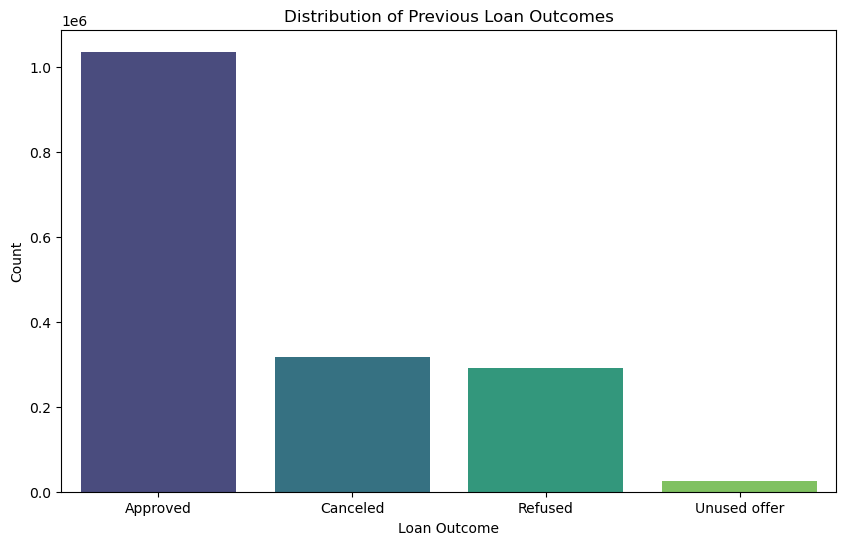

In [97]:
# Count occurrences of each 'NAME_CONTRACT_STATUS'
status_counts = previous_data['NAME_CONTRACT_STATUS'].value_counts()

# Visualize distribution using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Distribution of Previous Loan Outcomes')
plt.xlabel('Loan Outcome')
plt.ylabel('Count')
plt.show()

In [98]:
status_counts

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

From the above graph we can obeserve following -


*   The majority of previous loan outcomes were marked as "Approved," with a count of 1,036,781.
* "Canceled" and "Refused" are the next most common outcomes, with counts of 316,319 and 290,678, respectively.
* "Unused offer" has the lowest count among the categories, with 26,436 occurrences.
* The high count of "Approved" outcomes suggests that a significant proportion of previous loan applications were successfully approved.
* The counts of "Canceled" and "Refused" outcomes indicate that a notable number of applications were either canceled by the client or refused by the company.
* The count of "Unused offer" is relatively low compared to the other categories. This suggests that a smaller proportion of clients received offers but did not proceed with utilizing them.



## Analyze Default Patterns in Previous Loans.

The current data and previous data should be merged together on basis of "SK_ID_CURR" column.Similary, to previous step we will check for missing values in the 'TARGET' column and drop rows with missing values.

The countplot visualization shows the relationship between the previous loan outcomes ('NAME_CONTRACT_STATUS') and the current loan application's target variable ('TARGET'). The target variable has two categories: 0 and 1, representing clients with different payment behaviors.

In [99]:
# Merge the previous and current datasets on 'SK_ID_CURR'
merged_data = current_data.merge(previous_data, on='SK_ID_CURR', how='inner')
# Rename columns for clarity
merged_data.rename(columns={'AMT_CREDIT_x': 'AMT_CREDIT_application', 'AMT_CREDIT_y': 'AMT_CREDIT_previous'}, inplace=True)
# Handling missing values: Check for missing values in 'TARGET' column
missing_values_count_target = merged_data['TARGET'].isna().sum()
print(f'Missing values in TARGET: {missing_values_count_target}')
# If needed, handle missing values by imputing or dropping them
# Example: Drop rows with missing values in 'TARGET'
merged_data.dropna(subset=['TARGET'], inplace=True)
print(merged_data.shape)
print(f'Missing values count of TARGET: {missing_values_count_target}')

Missing values in TARGET: 0
(1413701, 158)
Missing values count of TARGET: 0


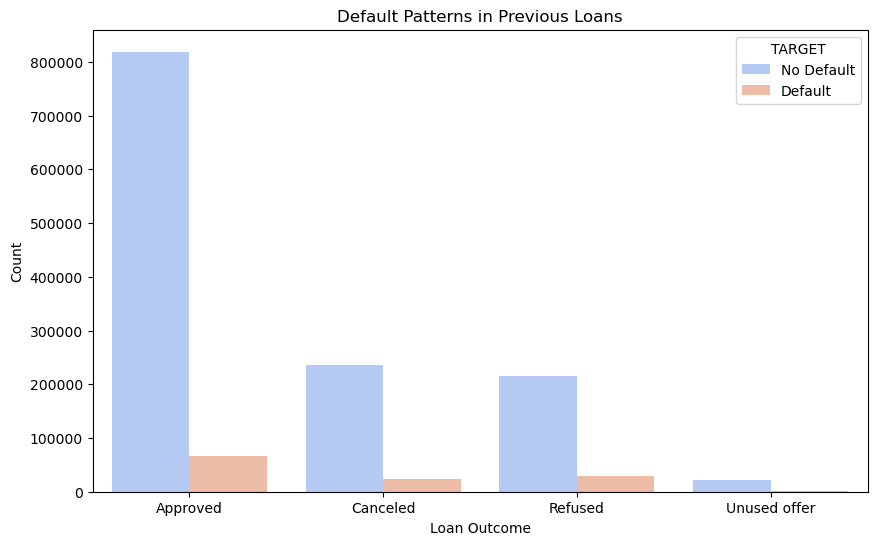

In [100]:
# Explore the relationship between 'NAME_CONTRACT_STATUS' and 'TARGET'
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', hue='TARGET', data=merged_data, palette='coolwarm')
plt.title('Default Patterns in Previous Loans')
plt.xlabel('Loan Outcome')
plt.ylabel('Count')
plt.legend(title='TARGET', loc='upper right', labels=['No Default', 'Default'])
plt.show()



*   We can observe that most of the people who were approved for the loan previously don't have difficulty in paying back. It is also the case for the types statuses.
* This suggests that clients with a history of approved loans are less likely to face payment difficulties in the current application.



##  Analyze Loan Amounts by Outcome



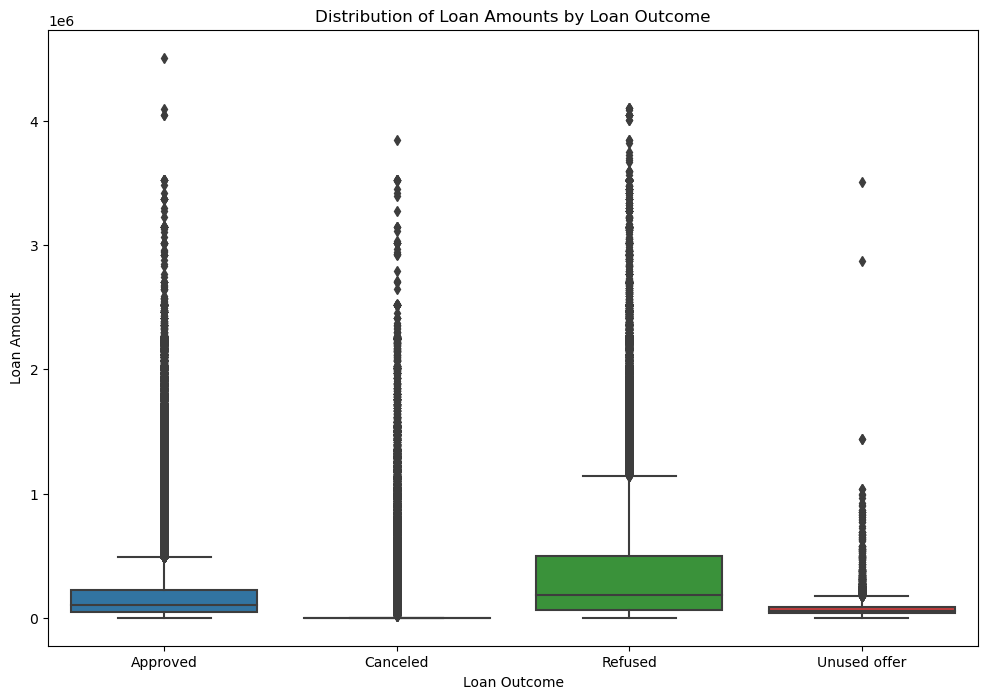

In [101]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT_previous', data=merged_data)
plt.title('Distribution of Loan Amounts by Loan Outcome')
plt.xlabel('Loan Outcome')
plt.ylabel('Loan Amount')
plt.show()


-  We can see that mostly the loan amounts that are unusally high are Refused and if we see at Approved loans we get idea of appropriate loan amount. i.e the amount that will be easily approved by the instituion.

## Debt-to-Income Ratio (DTI)

We create a new column 'DTI' by dividing 'AMT_ANNUITY' by 'AMT_INCOME_TOTAL'. Histograms provide a visual representation of the distribution of a single variable. The frequency of different DTI ranges for clients with and without payment difficulties.

 Check for the missing values before proceeding.

In [106]:
# Combine 'AMT_INCOME_TOTAL' and 'AMT_ANNUITY' to create a new column 'DTI'
current_data['DTI'] = current_data['AMT_ANNUITY'] / current_data['AMT_INCOME_TOTAL']
# Check for missing values in the newly created columns
print("Missing values in DTI:", current_data['DTI'].isnull().sum())
# Drop rows with missing values in 'DTI' column
current_data.dropna(subset=['DTI'], inplace=True)
print("Missing values in DTI:", current_data['DTI'].isnull().sum())

Missing values in DTI: 12
Missing values in DTI: 0


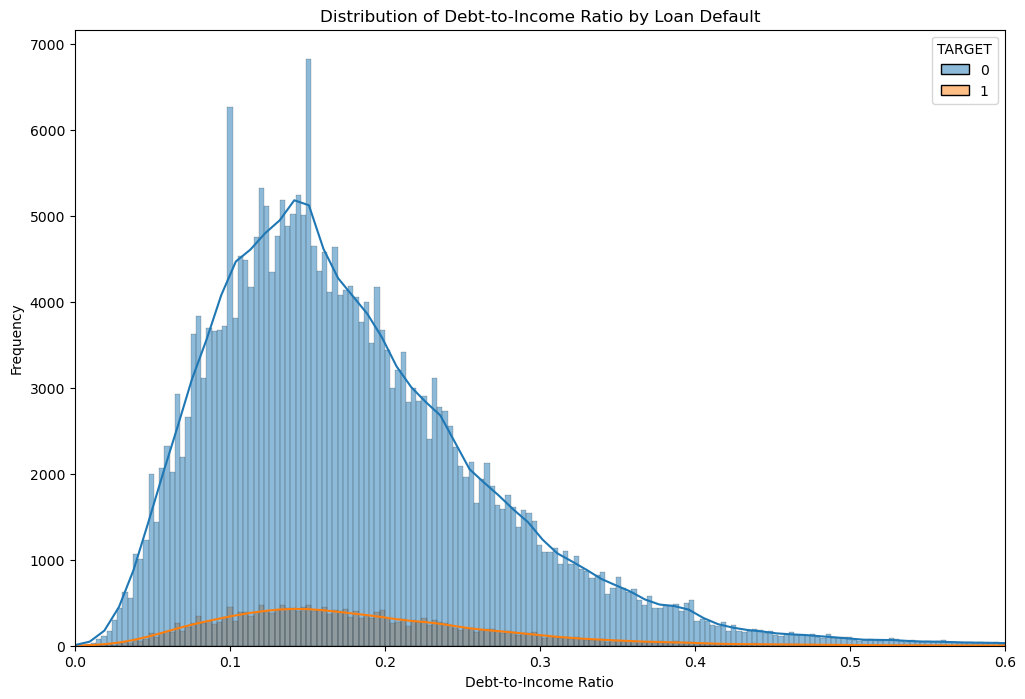

In [107]:
plt.figure(figsize=(12, 8))
sns.histplot(data=current_data, x='DTI', hue='TARGET', kde=True)
plt.title('Distribution of Debt-to-Income Ratio by Loan Default')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.xlim(0, 0.6)
plt.show()

***Graph Description-***

**For Target 0:**

Distribution Shape: Slightly right-skewed.

Peak: The highest frequency occurs in the range of 0.1 to 0.2 on the x-axis.

Spread: The width of each bar is narrow, indicating a concentration of values in a specific range.

Outliers: Two significant outliers are observed, suggesting a few data points with exceptionally high values.

Frequency: The peak frequency on the y-axis is around 5000.

**For Target 1:**

Distribution Shape: Somewhat uniform, with a slight right skew.

Peak: The most common range is from 0.1 to 0.2 on the x-axis.

Spread: The distribution is relatively uniform, with a moderate width of bars.

Skewness: There's a slight right skew, suggesting a tail on the right side.

Frequency: The peak frequency on the y-axis is below 1000, indicating a more dispersed distribution.

***Insights-***
* Target 0 shows a slightly right-skewed distribution, indicating that a portion of the population has higher DTI values.
* Target 1 exhibits a somewhat uniform distribution with a slight right skew, suggesting a more evenly spread DTI among individuals.
* Higher DTI values, as seen in the right-skewed portion of Target 0, might be indicative of a lower risk of default.
* The uniform distribution in Target 1 suggests that individuals with varying DTI values may experience payment difficulties.

## Analyze if down payment is related to a clients likeliness to default.

In [108]:
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")  # Suppress all warnings

# We will create new dataframes to perform below analysis
# create a dataframe from the application_data file
application_data = pd.read_csv('application_data.csv')
previous_application_data = pd.read_csv('previous_application.csv')

                         count          mean            std  min  25%     50%  \
NAME_CONTRACT_STATUS                                                            
Approved              568197.0   6832.369469   19304.373164 -0.9  0.0  2322.0   
Canceled                 536.0  21642.580410  101140.746442  0.0  0.0     0.0   
Refused                74778.0   7040.091841   29282.486057  0.0  0.0     0.0   
Unused offer           20650.0      1.252809     158.320930  0.0  0.0     0.0   

                         75%        max  
NAME_CONTRACT_STATUS                     
Approved              8302.5  3060045.0  
Canceled                 0.0   918000.0  
Refused               6583.5  2475000.0  
Unused offer             0.0    22500.0  


<Figure size 1200x800 with 0 Axes>

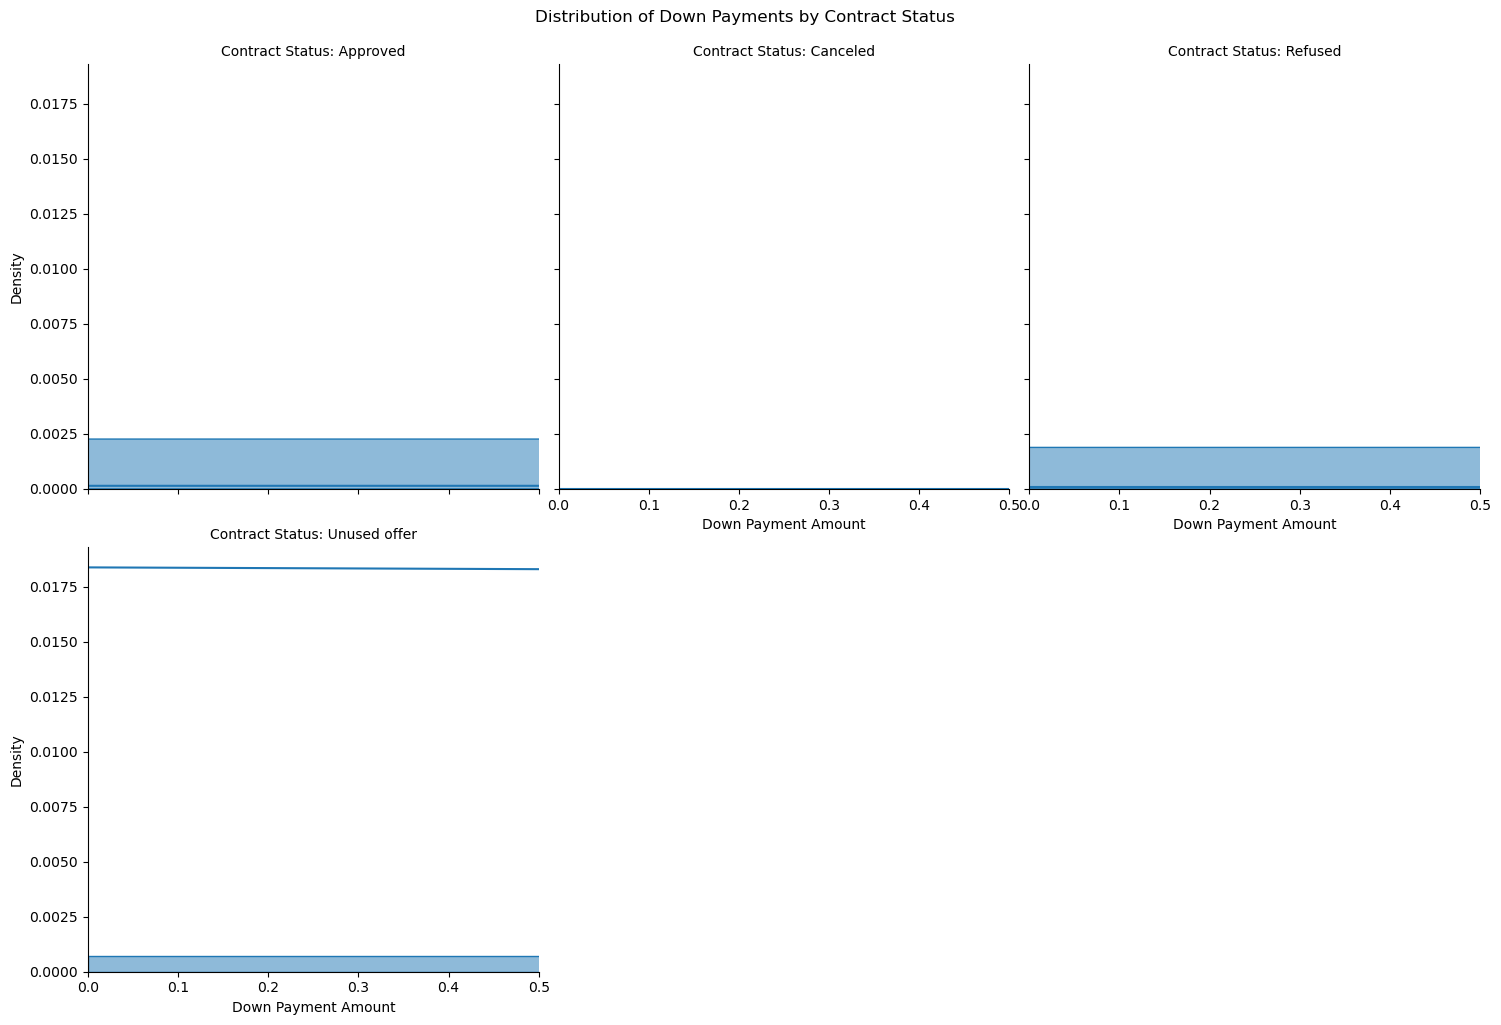

In [6]:
# Merge relevant columns from application_data and previous_application_data
# We're utilizing SK_ID_CURR and TARGET columns from application_data in this graph
# We're merging the SK_ID_CURR from application data and previous_application
# AMT_DOWN_PAYMENT and NAME_CONTRACT_STATUS are both from previous_application which is needed to analyze the relationship
merged_data = pd.merge(current_data[['SK_ID_CURR', 'TARGET']], 
                       previous_data[['SK_ID_CURR', 'AMT_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS']],
                       on='SK_ID_CURR', how='inner')

# Descriptive Statistics
# This code calculates descriptive statistics for the 'AMT_DOWN_PAYMENT' column grouped by 'NAME_CONTRACT_STATUS'. The statistics include count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum. The result is printed.
down_payment_stats = merged_data.groupby('NAME_CONTRACT_STATUS')['AMT_DOWN_PAYMENT'].describe()
print(down_payment_stats)

# Visual Exploration: Distribution of Down Payments
# This code creates a histogram using Seaborn to visualize the distribution of down payments. It shows the density of down payments, grouped by contract status. The title, x-axis label, y-axis label, and x-axis limits are set for better clarity. The plot is displayed.
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(merged_data, col="NAME_CONTRACT_STATUS", col_wrap=3, height=5)
g.map(sns.histplot, 'AMT_DOWN_PAYMENT', element='step', stat='density', common_norm=False, kde=True)
g.set_axis_labels('Down Payment Amount', 'Density')
g.set_titles('Contract Status: {col_name}')
g.set(xlim=(0, 0.5))
plt.suptitle('Distribution of Down Payments by Contract Status', y=1.02)
plt.show()
plt.show()

- In this graph, we chose a histogram in order compare the distribution of down payments for different contract status.
- A histogram is an excellent choice for displaying the distribution of a continuous variable, in this case, the down payment amount.
- We can see that the approved contract statuses show lower density in comparison to the cancelled, refused, and unused offer. 

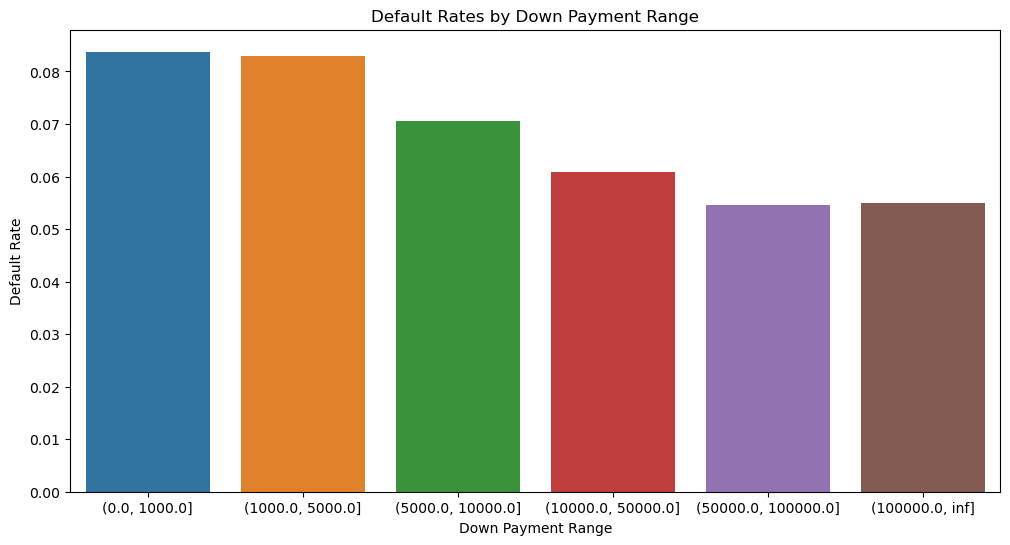

Chi-square value: 500.19917417872585
P-value: 7.232105926297502e-106
The difference in default rates between down payment groups is statistically significant.


In [110]:
# Default Rates by Down Payment Ranges
# This code creates bins for down payment ranges and assigns each row in the DataFrame to the corresponding bin based on the 'AMT_DOWN_PAYMENT' column. It then calculates the mean of the 'TARGET' column (default rate) for each bin.
down_payment_bins = [0, 1000, 5000, 10000, 50000, 100000, float('inf')]
merged_data['Down_Payment_Range'] = pd.cut(merged_data['AMT_DOWN_PAYMENT'], bins=down_payment_bins)
default_rates = merged_data.groupby('Down_Payment_Range')['TARGET'].mean()

# Visualize Default Rates
# This bar plot visualizes the default rates across different down payment ranges
# The x-axis represents the down payment ranges, and the y-axis represents the default rate
plt.figure(figsize=(12, 6))
sns.barplot(x=default_rates.index, y=default_rates.values)
plt.title('Default Rates by Down Payment Range')
plt.xlabel('Down Payment Range')
plt.ylabel('Default Rate')
plt.show()

# Statistical Testing: Chi-square test
# This performs a chi-square test to assess the significance of differences in default rates between various down payment groups.
# pd.crosstab creates a table then uses stats.chi2_contingency to perform the chi-square test.
# If the p-value is less than 0.05, it is concluded that the difference in default rates is statistically significant
observed_table = pd.crosstab(merged_data['TARGET'], merged_data['Down_Payment_Range'])
chi2, p, _, _ = stats.chi2_contingency(observed_table)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("The difference in default rates between down payment groups is statistically significant.")
else:
    print("There is no significant difference in default rates between down payment groups.")

- In this graph, the bar plot is used to visualize mean default rates in different amounts of down payment. Since the payment range is categorical and the default rates are numerical values, it is more effective to display this information with bar plot.
- Comparing the mean default rates are also much easier since it shows clear visuals where each bar represents a down payment and the height is the pay range.
- We can see that the more downpayment the client has in this graph, the lower the amount of default rates they have.
- The p-value represents the probability of observing a chi-square statistic. If the p-value is less than a chosen significance level (commonly 0.05), it indicates that there is a significant association between default status and down payment range.